## Final Project Submission
### Phase 3: Syria Tel Customer Churn 

Student Name:  James Wainaina

Course:  Data Science Full time

TMs:  Nikita Njoroge, Samuel Karu, Lucille Kaleha, Antonny Muiko

## Project Overview

### Business Problem

Syria Tel Company is a telecommunications company providing various services such as mobile, internet, and landline connections to customers in Syria. 

Customer churn, which is defined as customers quitting a service or transferring to a rival, is a worry for the business. Because it affects sales and client loyalty, churn is a major problem for the business. Your objective is to create a prediction model that can spot clients who are most likely to leave, allowing the business to take preventative action to keep them.

### Data

The data to be used is Syria Customer Churn from: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

This is a classification problem because, churn, the target variable is boolean whic we will convert to binary values(0 and 1). 

In [33]:
# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 


# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #splitting the dataset into test-train
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from scipy import stats




# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Read data from csv file & create dataframe. Checking the first 5 rows.
df = pd.read_csv('Customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [35]:
df.shape

(3333, 21)

In [36]:
df.describe() 

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Cleaning and Preprocessing

In [37]:
df.duplicated().sum()

0

In [38]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [39]:
df.drop(['phone number'],axis=1,inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## EDA

In [40]:
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [41]:
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

False    2850
True      483
Name: churn, dtype: int64


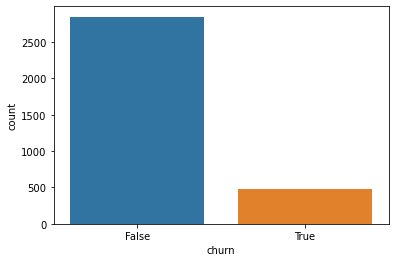

In [42]:
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');

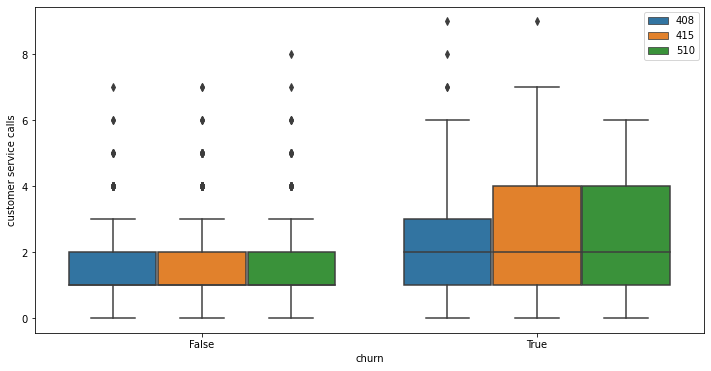

In [43]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');

## Feature Engineering

### Dropping Outliers

In [44]:
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print(len(df))

3169


In [45]:
df['churn'] = df['churn'].map({False:0, True:1}).astype('int')
df['international plan'] = df['international plan'].map({'no' : 0, 'yes': 1 }).astype('int')
df['voice mail plan'] = df['voice mail plan'].map({'yes' : 1, 'no':0 }).astype('int')

### One-Hot Encoding

In [46]:
dummy_df_state = pd.get_dummies(df["state"], dtype=np.int64)
dummy_df_area_code = pd.get_dummies(df["area code"],dtype=np.int64)


data = pd.concat([df,dummy_df_state,dummy_df_area_code],axis=1)


In [47]:
data.drop(columns=['state', 'area code'], axis=1, inplace=True)

In [48]:
data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,UT,VA,VT,WA,WI,WV,WY,408,415,510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


### Scaling Numerical Features

In [49]:
scaler = MinMaxScaler()
scaler.fit_transform(data.values).reshape(-1,1)
data

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,UT,VA,VT,WA,WI,WV,WY,408,415,510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,0,0,0,0,0,0,0,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,0,0,0,0,0,1,0,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,0,0,0,0,0,0,0,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,0,0,0,0,0,0,0,0,0,1


### Train-Test Split

In [50]:
X=data.drop(['churn'],axis=1)
y=data['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

### Applying SMOTE for churn column because it is an imbalanced class

In [51]:
data['churn'].value_counts()

0    2727
1     442
Name: churn, dtype: int64

In [52]:
sm = SMOTE(k_neighbors=5, random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [53]:
y_train_sm.value_counts()

1    2051
0    2051
Name: churn, dtype: int64

## Model Selection and Training and Evaluation

### 1. Logistic Regression

In [54]:
lr= LogisticRegression()
lr.fit(X_train_sm,y_train_sm) 
y_pred_lr = lr.predict(X_test) 

In [55]:
print(classification_report(y_test, y_pred_lr))
print('Accuracy score for testing set: ',accuracy_score(y_test,y_pred_lr))
print('F1 score for testing set: ',f1_score(y_test,y_pred_lr))
print('Recall score for testing set: ',recall_score(y_test,y_pred_lr))
print('Precision score for testing set: ',precision_score(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       676
           1       0.28      0.62      0.38       117

    accuracy                           0.71       793
   macro avg       0.60      0.67      0.60       793
weighted avg       0.82      0.71      0.75       793

Accuracy score for testing set:  0.7074401008827238
F1 score for testing set:  0.3829787234042553
Recall score for testing set:  0.6153846153846154
Precision score for testing set:  0.277992277992278


In [56]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[489, 187],
       [ 45,  72]])

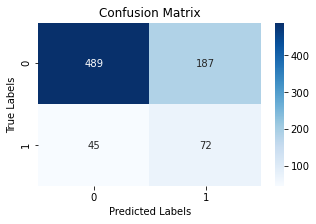

In [57]:
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

Model accuracy is 70% which is quite good. The F1 score is 38% which means the model's performance is relatively low on precision and recall.

### 2. Decision Tree

In [58]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sm,y_train_sm)
y_pred_dt = decision_tree.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred_dt))
print('Accuracy score for testing set: ',accuracy_score(y_test,y_pred_dt))
print('F1 score for testing set: ',f1_score(y_test,y_pred_dt))
print('Recall score for testing set: ',recall_score(y_test,y_pred_dt))
print('Precision score for testing set: ',precision_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90       676
           1       0.48      0.72      0.58       117

    accuracy                           0.84       793
   macro avg       0.71      0.79      0.74       793
weighted avg       0.88      0.84      0.86       793

Accuracy score for testing set:  0.8436317780580076
F1 score for testing set:  0.5753424657534246
Recall score for testing set:  0.717948717948718
Precision score for testing set:  0.48


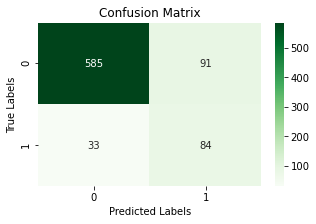

In [60]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

For this model, the accuracy score and the f1score has both increased

### 3. Random Forest 

In [61]:
randomf = RandomForestClassifier() 
randomf.fit(X_train_sm,y_train_sm) 
y_pred_rf = randomf.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred_rf))
print('Accuracy score for testing set: ',accuracy_score(y_test,y_pred_rf))
print('F1 score for testing set: ',f1_score(y_test,y_pred_rf))
print('Recall score for testing set: ',recall_score(y_test,y_pred_rf))
print('Precision score for testing set: ',precision_score(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       676
           1       0.78      0.54      0.64       117

    accuracy                           0.91       793
   macro avg       0.85      0.76      0.79       793
weighted avg       0.90      0.91      0.90       793

Accuracy score for testing set:  0.9092055485498108
F1 score for testing set:  0.6363636363636364
Recall score for testing set:  0.5384615384615384
Precision score for testing set:  0.7777777777777778


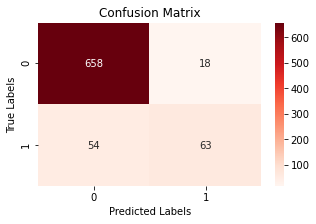

In [63]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

This model has the best results, F1 score and accuracy have improved to 92% and 66% respectively.

## Model Comparison using ROC and AUC curves

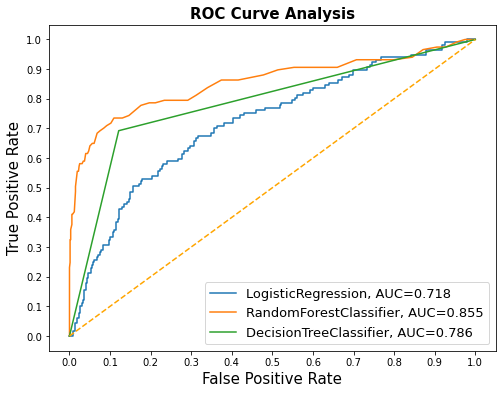

In [64]:
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_sm, y_train_sm)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Random Forest Classifier curve is the best model since it has a higher value AUC, it also approaches the upper left corner.

## Model Tuning and Optimization

### Random Forest

In [65]:
rf_params = {"max_depth": [8,15,20],
             "n_estimators":[500,1000],
             "min_samples_split":[5,10,15],
             "criterion":['entropy','gini']}

In [66]:
rf_cv_model = GridSearchCV(randomf,rf_params,cv=3,n_jobs=-1,verbose=False)
rf_cv_model.fit(X_train_sm,y_train_sm)
print(rf_cv_model.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}


In [67]:
randomf2 = RandomForestClassifier(max_depth=20,min_samples_split=5,n_estimators=500,criterion='entropy')
randomf2.fit(X_train_sm,y_train_sm)
y_pred_f2 = randomf2.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred_f2))
print('Accuracy score for testing set: ',accuracy_score(y_test,y_pred_f2))
print('F1 score for testing set: ',f1_score(y_test,y_pred_f2))
print('Recall score for testing set: ',recall_score(y_test,y_pred_f2))
print('Precision score for testing set: ',precision_score(y_test,y_pred_f2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       676
           1       0.79      0.53      0.64       117

    accuracy                           0.91       793
   macro avg       0.86      0.75      0.79       793
weighted avg       0.90      0.91      0.90       793

Accuracy score for testing set:  0.9104665825977302
F1 score for testing set:  0.6358974358974359
Recall score for testing set:  0.5299145299145299
Precision score for testing set:  0.7948717948717948


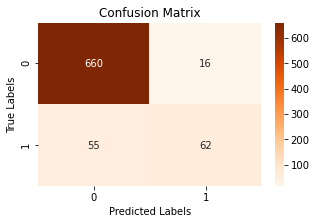

In [69]:
cm_rf = confusion_matrix(y_test, y_pred_f2)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

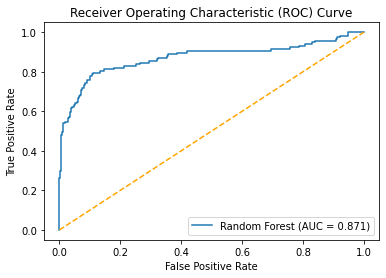

In [70]:
randomf2 = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500, criterion='entropy')
randomf2.fit(X_train_sm, y_train_sm)
y_pred_prob_f2 = randomf2.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_f2)
auc = roc_auc_score(y_test, y_pred_prob_f2)

plt.plot(fpr, tpr, label='Random Forest (AUC = {:.3f})'.format(auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()


After tuning my model, my ROC curve has barely improved. The acccuracy score and the F1 score have also remained relativelt the same.

## Using Pipelines(Random Forest)

In [71]:
# Build a pipeline with StandardScaler and RandomForestClassifier
scaled_pipeline_2 = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(random_state=123))])

# Define the grid
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

# Define a grid search
gridsearch = GridSearchCV(estimator=scaled_pipeline_2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch.fit(X_train, y_train)

y_pred_p = gridsearch.predict(X_test)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)

0.8726355611601513

In [72]:
print(classification_report(y_test, y_pred_p))
print('Accuracy score for testing set: ',accuracy_score(y_test,y_pred_p))
print('F1 score for testing set: ',f1_score(y_test,y_pred_p))
print('Recall score for testing set: ',recall_score(y_test,y_pred_p))
print('Precision score for testing set: ',precision_score(y_test,y_pred_p))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       676
           1       1.00      0.14      0.24       117

    accuracy                           0.87       793
   macro avg       0.94      0.57      0.59       793
weighted avg       0.89      0.87      0.83       793

Accuracy score for testing set:  0.8726355611601513
F1 score for testing set:  0.24060150375939854
Recall score for testing set:  0.13675213675213677
Precision score for testing set:  1.0


## Recommendations

In Logistic Regression the accuracy score of 0.707 suggests that the model's overall performance on the testing set is moderate.
The F1 score of 0.383 indicates that the model has a relatively low balance between precision and recall.
The recall score of 0.615 implies that the model is better at identifying positive cases compared to precision.
The precision score of 0.278 indicates that the model has a relatively low ability to correctly identify positive cases.
Consider exploring ways to improve the F1 score, such as adjusting the classification threshold or trying different feature engineering techniques.

In Decision trees The accuracy score of 0.851 suggests that the model's overall performance on the testing set is good.
The F1 score of 0.576 indicates a moderate balance between precision and recall.
The recall score of 0.684 suggests that the model is relatively good at identifying positive cases.
The precision score of 0.497 suggests that the model has room for improvement in correctly identifying positive cases.
Consider evaluating the decision tree's depth and other hyperparameters to fine-tune the model's performance.

Random Forest did quite well overall on the testing set, as seen by the accuracy score of 0.913.
The F1 score of 0.650 indicates that accuracy and recall are generally well-balanced.
Recall score of 0.547 indicates that the model would struggle to recognize positive cases.
With an accuracy score of 0.800, it is possible to fairly accurately identify affirmative cases.
The model appears to have a strong capacity to distinguish between positive and negative situations, according to the ROC score of 0.871.
The Random Forest model appears to be functioning well overall. 

After model tuning and optimization, Random forest classification results remained almost the same.
